#### Program Name: titanic-survival-prediction.ipynb
#### Purpose: predicts whether a passenger survived the titanic accident or not.
#### Author: Momodou Jallow

#### Import the Dependencies

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

#### Data Collection and Processing

In [35]:
titanic_data = pd.read_csv("titanic-data.csv")

In [36]:
# display the first 5 rows
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
# number of rows and columns in the data
titanic_data.shape

(891, 12)

In [38]:
# basic information about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The data has 891 data points(rows) and 12 columns.

In [39]:
# check for missing values
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

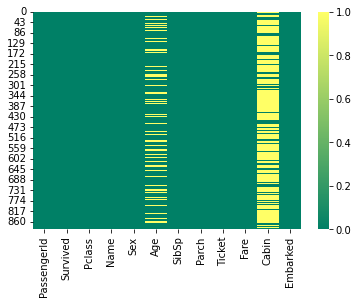

In [40]:
sns.heatmap(titanic_data.isnull(), cmap = "summer")

The data also has some missing values in the Age, Cabin, and Embarked columns. Cabin has the highest number of missing values, followed by Age.

#### Data Analysis & Visualization

<Axes: xlabel='Sex', ylabel='count'>

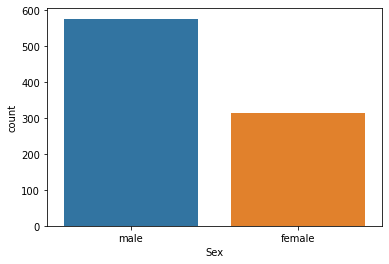

In [41]:
# Sex 
sns.countplot(x = "Sex", data = titanic_data)

We can see that they are more male passengers than female passengers. The number of male passengers is almost twice the number of female passengers.

<Axes: xlabel='Pclass', ylabel='count'>

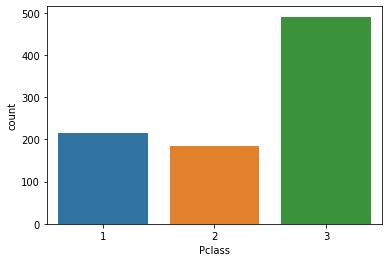

In [42]:
# Passenger class
sns.countplot(x = "Pclass", data = titanic_data)

Most of the passengers are travelling in passenger class 3. Passenger class 2 has the lowest number of passengers.

<Axes: xlabel='Survived', ylabel='count'>

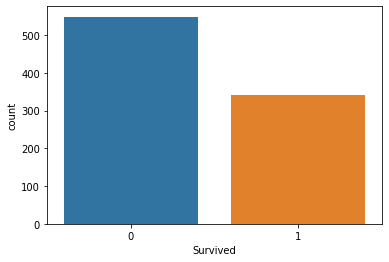

In [43]:
# Survived
sns.countplot(x = "Survived", data = titanic_data)

The number of passengers who did not survive is more than the number of passengers who survived the incident.

<Axes: xlabel='Survived', ylabel='count'>

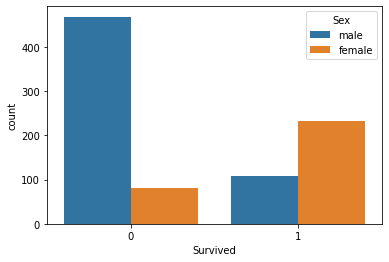

In [44]:
# Sex and Survived
sns.countplot(x = "Survived", hue = "Sex", data = titanic_data)

Most of the passengers who survived are females. Infact, females are two times more likely to survive than their male counterparts.This shows that priority was given to females during the rescue.

<Axes: xlabel='Survived', ylabel='count'>

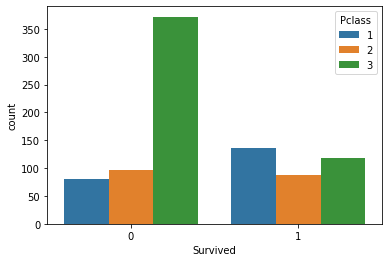

In [45]:
# Passenger class and Survived
sns.countplot(x = "Survived", hue = "Pclass", data = titanic_data)

We can see that most of the passengers who did not make it belong to the passenger class 3, and most of the passengers in passenger class 1 survived the incident. Priority was given to the VIP on the ship.

<Figure size 432x432 with 0 Axes>

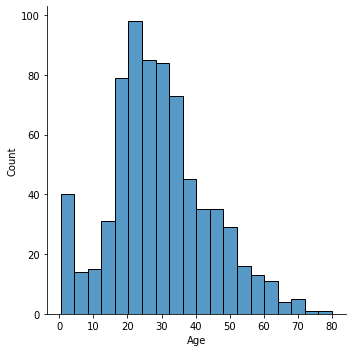

In [46]:
# Age distribution of the passengers on the ship
plt.figure(figsize = (6, 6))
sns.displot(titanic_data["Age"])
plt.show()

We can see that most of the passengers on the ship are within 20 to 35 years of age. Most of the passengers are in their youthful age.

#### Data Preprocessing

In [47]:
# drop missing values
titanic_data.dropna(inplace = True)

In [48]:
# check for missing values
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

There are no missing values in the data.

###### Label Endcoding- convert all categorical values into numeric

In [49]:
titanic_data.replace({
    "Sex":{"male":1, "female":0},
    "Embarked":{"S":0, "C": 1, "Q":2}
}, inplace = True)

In [50]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000,G6,0
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26.5500,C103,0


In [51]:
# Drop all columns that doesn't affect the outcome of the prediction
titanic_data.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [52]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,0,38.0,1,0,71.2833,1
3,1,1,0,35.0,1,0,53.1000,0
6,0,1,1,54.0,0,0,51.8625,0
10,1,3,0,4.0,1,1,16.7000,0
11,1,1,0,58.0,0,0,26.5500,0


###### Separate the feature variables from the target variable

In [53]:
X = titanic_data.drop(columns = "Survived", axis = 1)
y = titanic_data["Survived"]

##### Split the data into training and testing data

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state=2)

###### model instantiation and training

In [55]:
regressor_model = LogisticRegression()
regressor_model.fit(X_train, y_train)

LogisticRegression()

#### Model Evaluation

In [56]:
# accuracy on training data
training_data_prediction = regressor_model.predict(X_train)
training_accuracy_score = accuracy_score(y_train, training_data_prediction)
training_accuracy_score

0.7945205479452054

In [57]:
# accuracy on test data
test_data_prediction = regressor_model.predict(X_test)
test_data_accuracy_score = accuracy_score(y_test, test_data_prediction)
test_data_accuracy_score

0.7297297297297297

The training accuracy score is not very different from the test accuracy score thus the model is a fairly robust model.

#### Building a Predictive System

In [60]:
input_data = (1, 1, 54.0, 0, 0, 51.8625, 0)
input_data = np.asarray(input_data)
input_data = input_data.reshape(1, -1)
predictions = regressor_model.predict(input_data)
if(predictions[0] == 1):
    print("The person survived.")
else:
    print("The person did not survive.")

The person did not survive.
